Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.
* Binary logistic regression requires the dependent variable to be binary.
* For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
* Only the meaningful variables should be included.
* The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
* The independent variables are linearly related to the log odds.
* Logistic regression requires quite large sample sizes.

In [1]:
# Importando a biblioteca pandas para trabalhar com estruturas de dados tabulares (dataframes).
import pandas as pd

# Importando a biblioteca numpy para operações numéricas eficientes e computação matricial.
import numpy as np

# Importando a biblioteca sklearn.preprocessing para pré-processar os dados antes de alimentá-los em um modelo de aprendizado de máquina.
from sklearn import preprocessing

# Importando a biblioteca matplotlib.pyplot para criar visualizações gráficas interativas.
import matplotlib.pyplot as plt 
plt.rc("font", size=14)  # Definindo o tamanho padrão da fonte dos gráficos.

# Importando a classe LogisticRegression do scikit-learn para realizar uma tarefa de classificação com regressão logística.
from sklearn.linear_model import LogisticRegression

# Importando a função train_test_split do scikit-learn para dividir os dados em conjuntos de treinamento e teste.
from sklearn.model_selection import train_test_split

# Importando a biblioteca seaborn para criar gráficos estatísticos atraentes e informativos.
import seaborn as sns
sns.set(style="white")  # Definindo o estilo de fundo dos gráficos seaborn como branco.
sns.set(style="whitegrid", color_codes=True)  # Definindo o estilo de grade branca para os gráficos seaborn.


In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MAI0881/datasets/main/telecom_churn.csv', encoding = 'utf-8', sep = ',')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Cleansing data

In [3]:
df.replace(' ', pd.NA, inplace=True)

In [4]:
nan_counts = df.isnull().sum()
rows_with_nan = df[df.isnull().any(axis=1)]
#rows_with_nan

In [5]:
df.dropna(inplace=True)

In [6]:
df = df.drop(['customerID'], axis = 1)

In [ ]:
df['Churn'].nunique()

In [7]:
df['Churn'] = df['Churn'].replace({'Yes': 0, 'No': 1})

In [ ]:
df

## Data exploration 

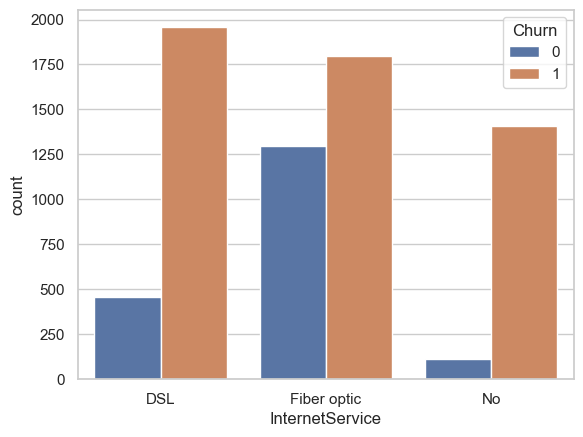

In [36]:
import seaborn as sns

sns.countplot(x='InternetService', hue='Churn', data=df)
plt.show()

In [37]:
df['Churn'].value_counts()

Churn
1    5163
0    1869
Name: count, dtype: int64

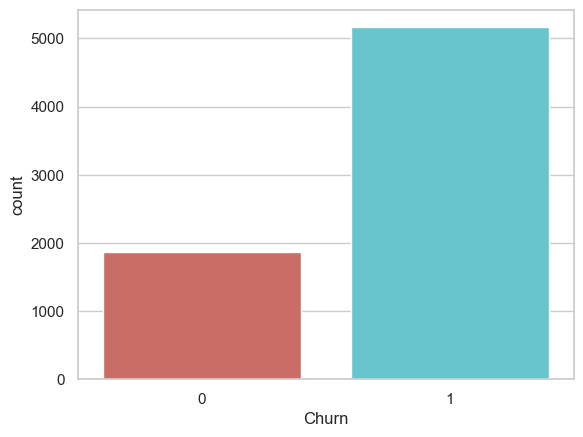

<Figure size 640x480 with 0 Axes>

In [39]:
sns.countplot(x='Churn',data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [42]:
count_no_churn = len(df[df['Churn']==1])
count_churn = len(df[df['Churn']==0])
pct_of_no_churn = count_no_churn/(count_no_churn+count_churn)
print("percentage of no churn is", pct_of_no_churn*100)
pct_of_churn = count_churn/(count_no_churn+count_churn)
print("percentage of churn", pct_of_churn*100)

percentage of no churn is 73.42150170648463
percentage of churn 26.578498293515356


In [45]:
df.groupby('Dependents')[['tenure','MonthlyCharges','TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
Dependents,,,
No,29.806000,67.002808,2187.709254
Yes,38.569319,59.617032,2507.955669


In [44]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df.groupby('MultipleLines')[['tenure','MonthlyCharges','TotalCharges']].mean()

In [ ]:
df.groupby('InternetService')[['tenure','MonthlyCharges','TotalCharges']].mean()

In [ ]:
df.groupby('TechSupport')[['tenure','MonthlyCharges','TotalCharges']].mean()

In [ ]:
df.groupby('PaymentMethod')[['tenure','MonthlyCharges','TotalCharges']].mean()

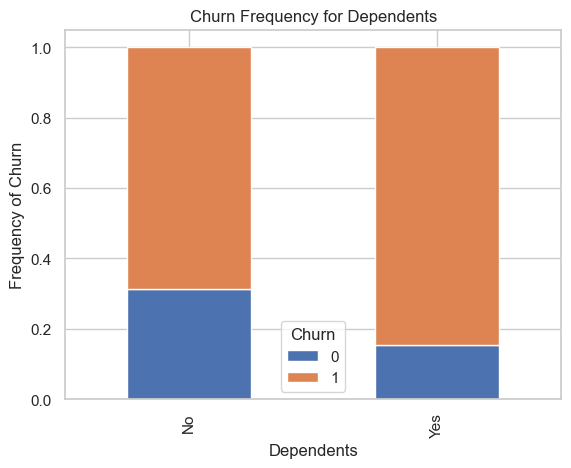

In [46]:
table=pd.crosstab(df.Dependents,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Frequency for Dependents')
plt.xlabel('Dependents')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_frequency_per_Dependents')

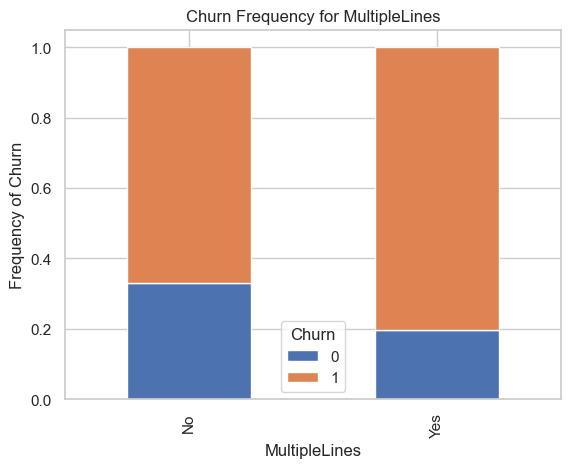

In [47]:
table=pd.crosstab(df.Partner,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Frequency for MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_frequency_per_MultipleLines')

The frequency of churn depends a great deal on the internet service. Thus, the internet service can be a good predictor of the outcome variable.

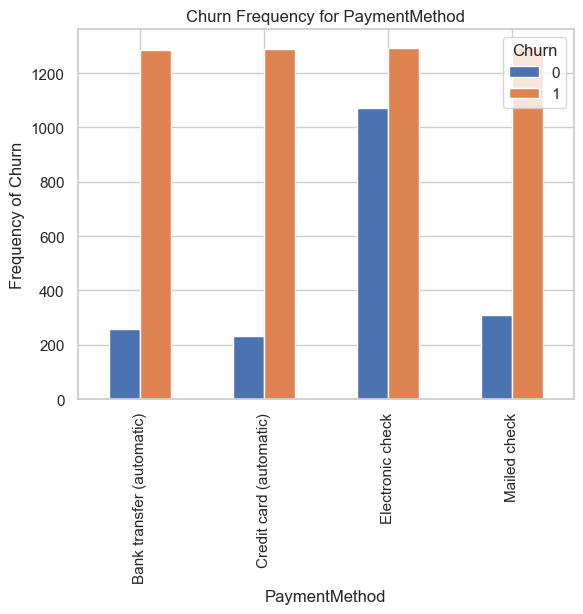

In [51]:
pd.crosstab(df.PaymentMethod,df.Churn).plot(kind='bar')
plt.title('Churn Frequency for PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_frequency_per_PaymentMethod')

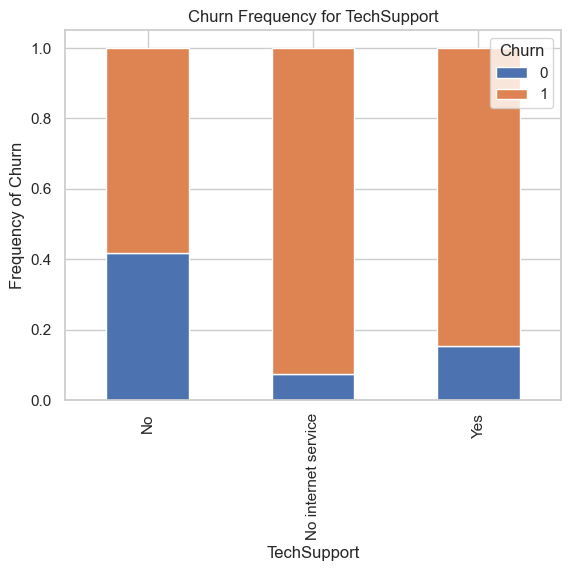

In [52]:
table=pd.crosstab(df.TechSupport,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Frequency for TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_frequency_per_TechSupport')

In [ ]:
df.dtypes

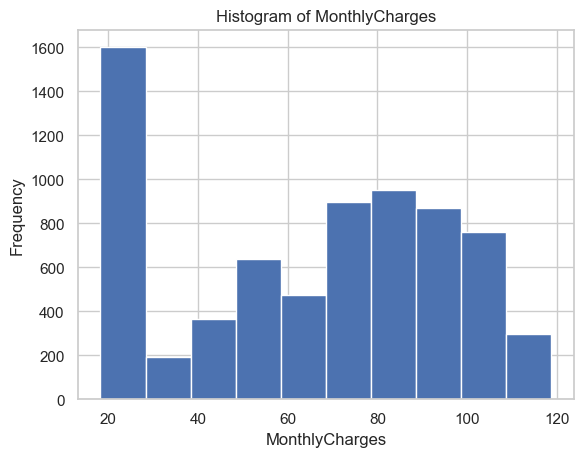

In [53]:
df.MonthlyCharges.hist()
plt.title('Histogram of MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.savefig('hist_MonthlyCharges')

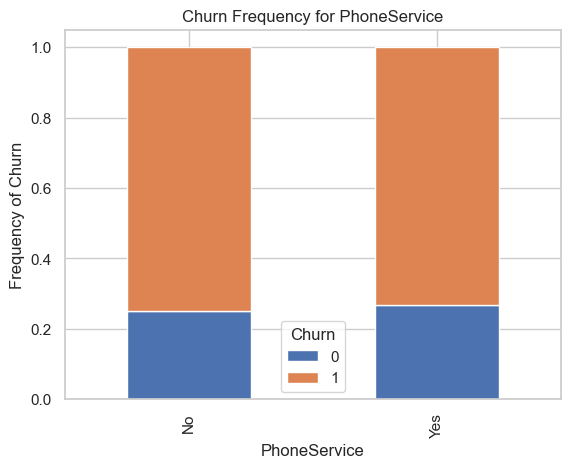

In [55]:
table=pd.crosstab(df.PhoneService,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Frequency for PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_frequency_per_PhoneService')

## Create dummy variables

In [8]:
cat_vars=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1
cat_vars=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [9]:
data_final=df[to_keep]
data_final.columns.values

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contr

## Over-sampling using SMOTE

With our training data created, I’ll up-sample the no-churn using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:

* Works by creating synthetic samples from the minor class (no churn) instead of creating copies.
* Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [10]:
X = data_final.loc[:, data_final.columns != 'Churn'] # These two lines separate the feature variables (X) and the target variable (y) from the dataset data_final.
y = data_final.loc[:, data_final.columns == 'Churn'] # The target variable is assumed to be in a column named 'Churn'.

from imblearn.over_sampling import SMOTE # This imports the SMOTE class from the imbalanced-learn library, which provides implementations of various techniques for handling imbalanced datasets.

os = SMOTE(random_state=0) # Creates an instance of the SMOTE class with a specified random seed (random_state=0).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # Splits the original dataset into training and testing sets, with 70% of the data used for training (X_train and y_train) and 30% for testing (X_test and y_test).
columns = X_train.columns # Stores the column names of the training set features (X_train).
os_data_X,os_data_y=os.fit_resample(X_train, y_train) # The SMOTE algorithm is applied to the training set (X_train and y_train) to oversample the minority class. The fit_sample method generates synthetic samples for the minority class, making it balanced with the majority class.
os_data_X = pd.DataFrame(data=os_data_X,columns=columns ) # The synthetic oversampled features are converted back into a Pandas DataFrame, using the original column names stored in the columns variable.
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn']) # The synthetic oversampled target variable is also converted back into a Pandas DataFrame, ensuring it has the column name 'Churn'.

# The following lines of code are used to print and verify the results of the oversampling:
print("length of oversampled data is ",len(os_data_X))
print("Number of no churn in oversampled data",len(os_data_y[os_data_y['Churn']==1]))
print("Number of churn",len(os_data_y[os_data_y['Churn']==0]))
print("Proportion of no churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==1])/len(os_data_X))
print("Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==0])/len(os_data_X))

length of oversampled data is  7216
Number of no churn in oversampled data 3608
Number of churn 3608
Proportion of no churn data in oversampled data is  0.5
Proportion of churn data in oversampled data is  0.5


C:\Users\Maiara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Maiara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


## Recursive Feature Elimination

In [11]:
data_final_vars=data_final.columns.values.tolist() # Essa linha obtém uma lista com os nomes das colunas presentes no DataFrame data_final. Esses nomes representarão todos os atributos disponíveis.
y=['Churn'] #Aqui, a variável Churn é definida como uma lista contendo o nome da coluna que representa a variável alvo (target variable) a ser prevista pelo modelo. Neste caso, o nome da coluna é 'Churn'.
X=[i for i in data_final_vars if i not in y] #Essa linha cria a lista X que conterá todos os atributos (colunas) exceto a variável alvo. Isso significa que X conterá apenas os atributos que serão usados como entradas (features) do modelo.

from sklearn.feature_selection import RFE # Importa a classe RFE (Recursive Feature Elimination) do módulo feature_selection do scikit-learn.
from sklearn.linear_model import LogisticRegression #Importa a classe LogisticRegression do módulo linear_model do scikit-learn, que será usada como o modelo de regressão logística para a seleção de atributos.

logreg = LogisticRegression() # Cria uma instância do modelo de Regressão Logística.
rfe = RFE(logreg, step = 20) # Cria um objeto RFE e especifica que desejamos selecionar 20 atributos. O modelo de regressão logística logreg será usado durante o processo de seleção.
rfe = rfe.fit(os_data_X, os_data_y.values.ravel()) # Aqui, o objeto RFE é ajustado aos dados. os_data_X representa as features do conjunto de treinamento após a aplicação da técnica SMOTE (oversampling) e os_data_y é o respectivo target após o mesmo processo.
print(rfe.support_) #Exibe um array booleano que indica quais atributos foram selecionados pelo RFE. O valor True em uma determinada posição do array significa que o atributo correspondente foi selecionado.
print(rfe.ranking_) #Exibe o ranking dos atributos. Aqueles com ranking 1 são considerados os mais importantes, e aqueles com valores mais altos são considerados menos importantes.

[False False False False  True  True  True  True  True  True False False
 False False False  True  True False  True False  True  True False  True
  True False  True  True False False False False False False False  True
  True  True  True False  True  True False  True False]
[3 3 3 3 1 1 1 1 1 1 3 2 3 3 2 1 1 3 1 3 1 1 3 1 1 3 1 1 3 3 3 3 2 3 3 1 1
 1 1 3 1 1 3 1 3]


C:\Users\Maiara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
faixa1 = data_final.columns.values[5:10]
faixa2 = data_final.columns.values[15:17]
faixa3 = data_final.columns.values[18]
faixa4 = data_final.columns.values[20:22]
faixa5 = data_final.columns.values[23:25]
faixa6 = data_final.columns.values[26:28]
faixa7 = data_final.columns.values[35:39]
faixa8 = data_final.columns.values[40:42]
faixa9 = data_final.columns.values[44]

print("faixa1:", faixa1)
print("faixa2:", faixa2)
print("faixa3:", faixa3)
print("faixa4:", faixa4)
print("faixa5:", faixa5)
print("faixa6:", faixa6)
print("faixa7:", faixa7)
print("faixa8:", faixa8)
print("faixa9:", faixa9)

faixa1: ['gender_Female' 'gender_Male' 'Partner_No' 'Partner_Yes' 'Dependents_No']
faixa2: ['MultipleLines_Yes' 'InternetService_DSL']
faixa3: InternetService_No
faixa4: ['OnlineSecurity_No internet service' 'OnlineSecurity_Yes']
faixa5: ['OnlineBackup_No internet service' 'OnlineBackup_Yes']
faixa6: ['DeviceProtection_No internet service' 'DeviceProtection_Yes']
faixa7: ['StreamingMovies_No internet service' 'StreamingMovies_Yes'
 'Contract_Month-to-month' 'Contract_One year']
faixa8: ['PaperlessBilling_No' 'PaperlessBilling_Yes']
faixa9: PaymentMethod_Electronic check


## Implementing the model

In [13]:
cols=['gender_Female', 'gender_Male','Partner_No', 'Partner_Yes', 'Dependents_No','MultipleLines_Yes', 'InternetService_DSL', 
      'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'StreamingMovies_Yes',
      'Contract_Month-to-month', 'Contract_One year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']
X=os_data_X[cols]
y=os_data_y['Churn']

## Tratando multicolinearidade

In [ ]:
import numpy as np

# Supondo que 'data' é o seu DataFrame ou matriz contendo as variáveis preditoras (features)
# Converter 'data' para um array NumPy (se for um DataFrame)
data_array = X.values if isinstance(X, pd.DataFrame) else data

# Calcular o posto (rank) da matriz
rank = np.linalg.matrix_rank(data_array)

# Obter o número de variáveis preditoras (colunas)
num_features = data_array.shape[1]

# Verificar a dependência linear
if rank < num_features:
    print("Dependência linear detectada. A matriz é rank-deficiente.")
else:
    print("Sem dependência linear. A matriz é de posto completo (full rank).")

As variáveis:
DeviceProtection_No internet service
OnlineSecurity_No internet service
StreamingMovies_No internet service	
OnlineBackup_No internet service

foram deixadas de lado pois estavam causando multicolinearidade e mantemos apenas a variável 'InternetService_No'

## Implementing the model

In [14]:
import statsmodels.api as sm # statsmodels é uma lib que fornece várias funções e classes para realizar análises estatísticas e ajuste de modelos.
logit_model=sm.Logit(y,X) # criando um objeto logit_model que representa o modelo de regressão logística. O primeiro argumento y é o vetor que contém a variável resposta (variável dependente) do modelo, e o segundo argumento X é a matriz (ou DataFrame) que contém as variáveis preditoras (variáveis independentes). O modelo logit é usado para modelar a relação entre a variável resposta binária e as variáveis preditoras.
result=logit_model.fit() # ajustando o modelo logit aos dados fornecidos. O método fit() realiza a estimação dos parâmetros do modelo usando os dados de entrada X e y. Ele encontra os coeficientes que melhor se ajustam aos dados para descrever a relação entre a variável resposta binária e as variáveis preditoras.
print(result.summary2()) # O método summary2() gera uma tabela com várias informações úteis sobre o modelo, incluindo os coeficientes estimados, seus erros padrão, estatísticas de teste (como o valor Z), valores p, intervalos de confiança para os coeficientes e outras métricas relevantes. 

Optimization terminated successfully.
         Current function value: 0.506412
         Iterations 6
                                Results: Logit
Model:                   Logit                 Method:                MLE      
Dependent Variable:      Churn                 Pseudo R-squared:      0.269    
Date:                    2023-07-21 07:21      AIC:                   7342.5385
No. Observations:        7216                  BIC:                   7459.5675
Df Model:                16                    Log-Likelihood:        -3654.3  
Df Residuals:            7199                  LL-Null:               -5001.8  
Converged:               1.0000                LLR p-value:           0.0000   
No. Iterations:          6.0000                Scale:                 1.0000   
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

Retirando as variáveis com p-value > 0.5:
Partner_Yes
StreamingMovies_Yes 
Contract_One year

In [19]:
cols=['gender_Female', 'gender_Male','Partner_No', 'Dependents_No','MultipleLines_Yes', 'InternetService_DSL', 
      'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
      'Contract_Month-to-month', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check'] 
X=os_data_X[cols]
y=os_data_y['Churn']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.506431
         Iterations 6
                                Results: Logit
Model:                   Logit                 Method:                MLE      
Dependent Variable:      Churn                 Pseudo R-squared:      0.269    
Date:                    2023-07-21 08:30      AIC:                   7336.8115
No. Observations:        7216                  BIC:                   7433.1883
Df Model:                13                    Log-Likelihood:        -3654.4  
Df Residuals:            7202                  LL-Null:               -5001.8  
Converged:               1.0000                LLR p-value:           0.0000   
No. Iterations:          6.0000                Scale:                 1.0000   
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

## Logistic Regression Model Fitting

In [20]:
from sklearn.linear_model import LogisticRegression # A classe LogisticRegression é utilizada para criar e treinar um modelo de regressão logística
from sklearn import metrics # a classe metrics contém várias funções para avaliar a performance do modelo.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # dividindo os dados em conjunto 
# de treinamento e conjunto de teste. A função train_test_split() é usada para realizar essa divisão.
# Os argumentos X e y representam as variáveis preditoras e a variável resposta, respectivamente. O argumento test_size=0.3 
# define que 30% dos dados serão utilizados para formar o conjunto de teste, enquanto o restante (70%) 
# será utilizado para treinar o modelo. O argumento random_state=0 é usado para garantir que a divisão 
# seja feita de forma determinística, ou seja, sempre obteremos a mesma divisão de treinamento/teste quando executarmos o código novamente.
logreg = LogisticRegression() # o objeto logreg da classe LogisticRegression representa o modelo de regressão logística que será treinado. 
# A função fit() é usada para treinar o modelo com os dados de treinamento (X_train e y_train). Durante o treinamento, o modelo aprenderá os 
# coeficientes (pesos) que melhor se ajustam aos dados de treinamento, de forma a realizar a previsão da variável resposta com base nas variáveis preditoras.
logreg.fit(X_train, y_train) #Após a execução do código, o objeto logreg conterá o modelo de regressão logística treinado, pronto para fazer previsões em novos dados não vistos.

LogisticRegression()

In [30]:
y_pred = logreg.predict(X_test) # A função predict() é aplicada ao modelo logreg com X_test como argumento, e ela retorna uma matriz contendo as previsões do modelo para o conjunto de teste. Essas previsões são armazenadas na variável y_pred.
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test))) # calculando a acurácia do modelo de regressão logística no conjunto de teste. A acurácia é usada para avaliar a performance de modelos de classificação. Ela mede a proporção de previsões corretas em relação ao total de previsões feitas pelo modelo.

#O método score() é aplicado ao modelo logreg com X_test e y_test como argumentos. Ele compara as previsões do modelo (armazenadas em y_pred) com as verdadeiras classes do conjunto de teste (y_test) e calcula a acurácia como a proporção de previsões corretas em relação ao total de amostras no conjunto de teste.

Accuracy of logistic regression classifier on test set: 0.82


## Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred) # A função confusion_matrix é usada para calcular a matriz de confusão, 
# que é uma tabela que descreve o desempenho de um modelo de classificação em termos de verdadeiros positivos (TP), 
# falsos positivos (FP), verdadeiros negativos (TN) e falsos negativos (FN).
print(confusion_matrix)

# estamos aplicando a função confusion_matrix com y_test e y_pred como argumentos. y_test contém as verdadeiras classes 
# (rótulos) do conjunto de teste e y_pred contém as previsões do modelo de regressão logística para essas amostras.

# A função confusion_matrix compara as previsões do modelo (em y_pred) com as verdadeiras classes (em y_test) e calcula a 
# matriz de confusão. A matriz de confusão é uma matriz 2x2 no caso de um problema de classificação binária, onde cada célula 
# da matriz representa a contagem de amostras em uma determinada combinação de verdadeiros e falsos positivos/negativos.

[[909 192]
 [188 876]]


O resultado nos mostra que temos 909+876 pedições corretas e 188+192 predições incorretas.

## Compute precision, recall, F-measure and support

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1101
           1       0.82      0.82      0.82      1064

    accuracy                           0.82      2165
   macro avg       0.82      0.82      0.82      2165
weighted avg       0.82      0.82      0.82      2165




Tradução de cada métrica conforme a citação do Scikit Learn:

* Precisão (Precision):
A precisão é a razão tp / (tp + fp), onde tp é o número de verdadeiros positivos e fp é o número de falsos positivos. A precisão é intuitivamente a habilidade do classificador de não rotular uma amostra como positiva se ela for negativa.

* Recall (Revocação):
A revocação é a razão tp / (tp + fn), onde tp é o número de verdadeiros positivos e fn é o número de falsos negativos. A revocação é intuitivamente a habilidade do classificador de encontrar todas as amostras positivas.

* F-measure (F-medida):
A F-medida é interpretada como uma média harmônica ponderada da precisão e da revocação, onde a F-medida atinge seu melhor valor em 1 e pior valor em 0.

* Suporte (Support):
O suporte é o número de ocorrências de cada classe em y_test.

Em resumo, essas métricas são utilizadas para avaliar o desempenho de um classificador em tarefas de classificação. A precisão mede a proporção de verdadeiros positivos entre todas as amostras classificadas como positivas, enquanto a revocação mede a proporção de verdadeiros positivos encontrados entre todas as amostras verdadeiramente positivas. A F-medida combina a precisão e a revocação em uma única métrica, sendo útil quando se deseja equilibrar o trade-off entre ambas. O suporte informa quantas amostras existem para cada classe na coleção de teste (y_test).

Do dataset completo, 82% dos clientes testados realmente resultaram em Churn para a empresa.

## ROC Curve

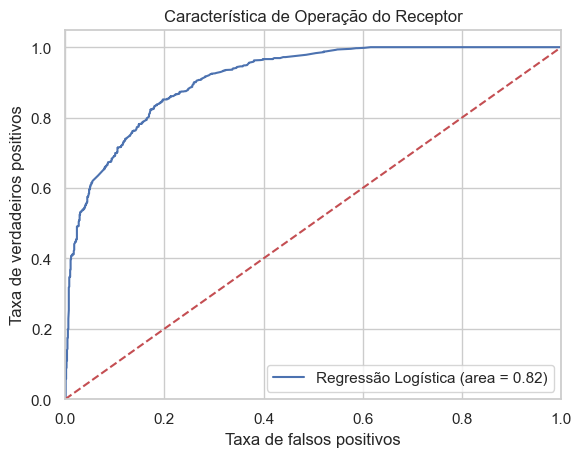

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regressão Logística (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.title('Característica de Operação do Receptor')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()